In [1]:
import pandas as pd

df = pd.read_csv("aussie_jobs_cleaned_withSalary.csv")
df

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url,average_salary,Salary
0,Science & Technology,Melbourne,Smaart Recruitment,AU,seek,About the Company: A large player in the plast...,Junior Lab Assistant,Full Time,2018-04-16T02:00:37Z,$40k - $45k + super,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35992199,42.5,42500.00000
1,Hospitality & Tourism,Sydney,Novotel Brighton Beach,AU,seek,We currently have the opportunity for a custom...,Night Auditor - Novotel Brighton Beach,Full Time,2018-04-13T05:48:02Z,HIGA Front Office Grade 2,Southern Suburbs & Sutherland Shire,https://www.seek.com.au/job/35982044,2.0,20000.00000
2,Information & Communication Technology,Sydney,Aurec,AU,seek,Are you ready to join one of the hottest new t...,Software Engineer l Python l Startup l Sydney ...,Full Time,2018-04-16T06:16:29Z,"Great Salary, 9-5ph, Modern Office","CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35996602,7.0,70000.00000
3,Trades & Services,Melbourne,Symmetry HR â€“ VIC Industrial,AU,seek,We have an opportunity to join a leader in th...,Welder,Contract/Temp,2018-04-12T23:51:53Z,Up to $28.29 p.h.,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35975371,28.5,45600.00000
4,Science & Technology,Brisbane,Evolve Scientific Recruitment,AU,seek,About the Role: We are seeking a QA Associate ...,QA Associate,Contract/Temp,2018-04-12T06:27:08Z,$30 - $35 per hour,Southern Suburbs & Logan,https://www.seek.com.au/job/35971481,32.5,52000.00000
5,Accounting,Sydney,Sharp & Carter Finance and Accounting Sydney,AU,seek,About theÂ role Our client based in the CBD i...,Accounts Payable Officer,Contract/Temp,2018-04-13T07:00:47Z,"$60,000 + Superannuation","CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35983754,30.0,60000.00000
6,Trades & Services,Sydney,Momentum Consulting Group Pty Ltd,AU,seek,White Card Labourers are required for an ASAP...,WHITE CARD LABOURERS - START NOW!,Contract/Temp,2018-04-16T01:07:43Z,$24 - $25 p.h.,Parramatta & Western Suburbs,https://www.seek.com.au/job/35991209,24.5,39200.00000
7,Community Services & Development,Sydney,EPIC Assist,AU,seek,EPIC Welcomes Everyone EPIC celebrates diversi...,Employment Consultant,Full Time,2018-04-13T05:28:20Z,"Total Remuneration package equal to $62,000 pa",South West & M5 Corridor,https://www.seek.com.au/job/35981542,31.0,31000.00000
8,Real Estate & Property,Sydney,Davidson Projects & Operations,AU,seek,About the Company Our Client is an ASX listed...,Retail Tenancy Coordinator/ Design Manager,Full Time,2018-04-16T00:42:57Z,"Up to $110,000 + Super","CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35990771,55.0,110000.00000
9,Construction,Sydney,Ignite,AU,seek,The Company: A large NSW government department...,Operational Systems Coordinator,Contract/Temp,2018-04-12T07:33:10Z,$656 per day,"CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35972630,656.0,239440.00000


In [7]:
# parse 'post_date' column to datetime format
df['post_date'] = pd.to_datetime(df['post_date'])

# # resample to daily frequency, counting the number of records per day
# df = df.resample('D', on='post_date').count().reset_index()

# write dataframe to new csv file
df.to_csv('calendar_heatmap.csv', index=False)

In [2]:
df = pd.read_csv('calendar_heatmap.csv')
df['date'] = pd.to_datetime(df['Date-Posted']).dt.strftime('%Y-%m-%dT%H:%M:%S.000Z')
df.dropna(subsetinplace=True)
df['date']


0       2023-04-19T00:00:00.000Z
1       2023-04-24T00:00:00.000Z
2       2023-04-14T00:00:00.000Z
3       2023-04-22T00:00:00.000Z
4       2023-04-13T00:00:00.000Z
                  ...           
2424    2023-04-13T00:00:00.000Z
2425                         NaN
2426    2023-03-27T00:00:00.000Z
2427    2023-04-25T00:00:00.000Z
2428    2023-04-13T00:00:00.000Z
Name: date, Length: 2429, dtype: object

In [3]:
df.to_csv('calendar_heatmap.csv', index=False)

USing global data

In [4]:
df = pd.read_csv('global_jobs_cleaned.csv')
df['date'] = pd.to_datetime(df['Date-Posted'])
df
# df.to_csv('calendar_heatmap.csv', index=False)

Removing description column from data

In [17]:
df = pd.read_csv('aussie_jobs_withSalary.csv')

df.drop('job_description', axis=1, inplace=True)
df.drop('job_board', axis=1, inplace=True)

df.to_csv('aussie_jobs_smaller_withSalary.csv')

In [5]:
df = pd.read_csv('Salary_Data.csv')
df['Years of Experience']

0        5.0
1        3.0
2       15.0
3        7.0
4       20.0
        ... 
6699    20.0
6700     3.0
6701     4.0
6702    14.0
6703     1.0
Name: Years of Experience, Length: 6704, dtype: float64

C:\Users\tahaa\AppData\Local\Temp\ipykernel_14312\3402022027.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df.pivot( 'Years of Experience','Age', 'Salary')


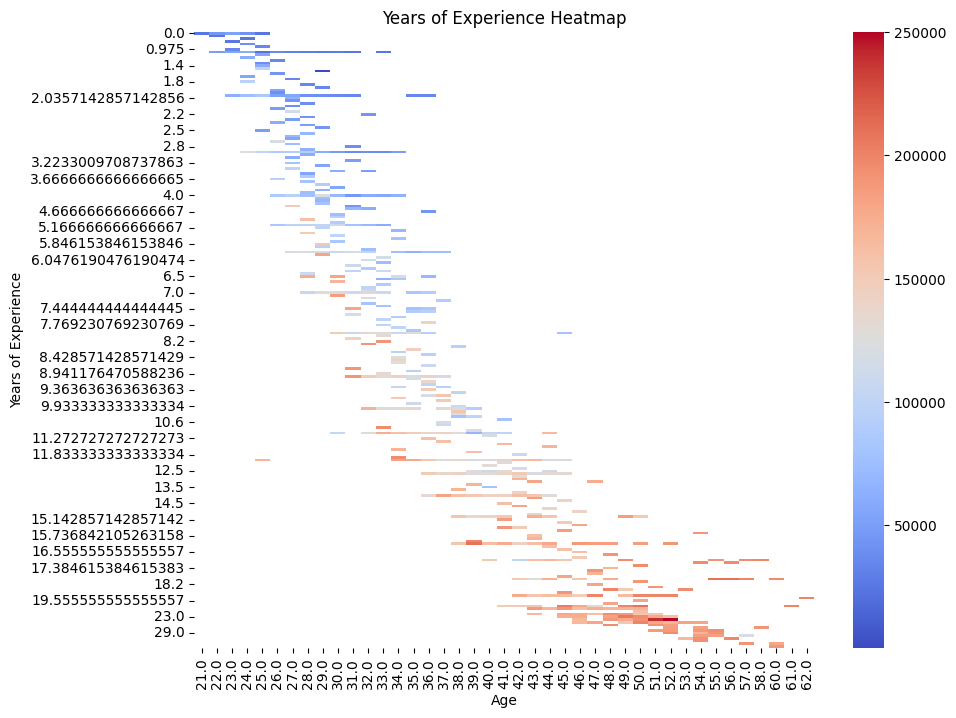

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = df.groupby(['Age', 'Years of Experience']).mean().reset_index()

# Reshape the DataFrame for heatmap
heatmap_data = df.pivot( 'Years of Experience','Age', 'Salary')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm')
plt.title('Years of Experience Heatmap')
plt.show()